In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import glob
import itertools
import pandas as pd
import seaborn as sns


#import splitfolders
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
train_data_dir = r"D:/experiments/Datasets/ip102_v1.1-002/ip102_v1.1/prepared_data/train_merged/"
valid_data_dir = r"D:/experiments/Datasets/ip102_v1.1-002/ip102_v1.1/prepared_data/val_merged/"
test_data_dir = r"D:/experiments/Datasets/ip102_v1.1-002/ip102_v1.1/prepared_data/test_merged/"

In [3]:
classes = ['Adristyrannus Adult', 'Adristyrannus Larva', 'Aleurocanthus spiniferus Adult', 'Aleurocanthus spiniferus Pupa', 'Ampelophaga Adult', 'Ampelophaga Larva', 'Ampelophaga Pupa', 'Aphis citricola Vander Goot Adult', 'Apolygus lucorum Adult', 'Bactrocera tsuneonis Adult', 'Beet spot flies Adult', 'Beet spot flies Larva', 'Brevipoalpus lewisi McGregor Adult', 'Ceroplastes rubens Adult', 'Chlumetia transversa Adult', 'Chlumetia transversa Larva', 'Chrysomphalus aonidum Adult', 'Cicadella viridis Adult', 'Cicadellidae Adult', 'Dacus dorsalis(Hendel) Adult', 'Dacus dorsalis(Hendel) Larva', 'Dacus dorsalis(Hendel) Pupa', 'Dasineura sp Adult', 'Dasineura sp Larva', 'Dasineura sp Pupa', 'Deporaus marginatus Pascoe Adult', 'Erythroneura apicalis Adult', 'Icerya purchasi Maskell Adult', 'Lawana imitata Melichar Adult', 'Limacodidae Adult', 'Limacodidae Larva', 'Limacodidae Pupa', 'Locustoidea Adult', 'Lycorma delicatula Adult', 'Lycorma delicatula Larva', 'Mango flat beak leafhopper Adult', 'Miridae Adult', 'Nipaecoccus vastalor Adult', 'Panonchus citri McGregor Adult', 'Papilio xuthus Adult', 'Papilio xuthus Larva', 'Phyllocnistis citrella Stainton Adult', 'Phyllocnistis citrella Stainton Larva', 'Pieris canidia Adult', 'Potosiabre vitarsis Adult', 'Potosiabre vitarsis Larva', 'Prodenia litura Adult', 'Prodenia litura Egg', 'Prodenia litura Larva', 'Prodenia litura Pupa', 'Pseudococcus comstocki Kuwana Adult', 'Rhytidodera bowrinii white Adult', 'Rice Stemfly Adult', 'Rice Stemfly Larva', 'Salurnis marginella Guerr Adult', 'Scirtothrips dorsalis Hood Adult', 'Sternochetus frigidus Adult', 'Tetradacus c Bactrocera minax Adult', 'Tetradacus c Bactrocera minax Larva', 'Thrips Adult', 'Toxoptera aurantii Adult', 'Toxoptera citricidus Adult', 'Trialeurodes vaporariorum Adult', 'Unaspis yanonensis Adult', 'Viteus vitifoliae Adult', 'Xylotrechus Adult', 'alfalfa plant bug Adult', 'alfalfa seed chalcid Adult', 'alfalfa weevil Adult', 'alfalfa weevil Egg', 'alfalfa weevil Larva', 'aphids Adult', 'army worm Adult', 'army worm Egg', 'army worm Larva', 'army worm Pupa', 'asiatic rice borer Adult', 'asiatic rice borer Larva', 'asiatic rice borer Pupa', 'beet army worm Adult', 'beet army worm Egg', 'beet army worm Larva', 'beet army worm Pupa', 'beet fly Adult', 'beet weevil Adult', 'bird cherry-oataphid Adult', 'black cutworm Adult', 'black cutworm Larva', 'black cutworm Pupa', 'blister beetle Adult', 'brown plant hopper Adult', 'brown plant hopper Egg', 'brown plant hopper Larva', 'cabbage army worm Adult', 'cabbage army worm Larva', 'cerodonta denticornis Adult', 'cerodonta denticornis Pupa', 'corn borer Adult', 'corn borer Egg', 'corn borer Larva', 'corn borer Pupa', 'english grain aphid Adult', 'flax budworm Adult', 'flax budworm Egg', 'flax budworm Larva', 'flax budworm Pupa', 'flea beetle Adult', 'grain spreader thrips Adult', 'green bug Adult', 'grub Larva', 'grub Pupa', 'large cutworm Adult', 'large cutworm Larva', 'large cutworm Pupa', 'legume blister beetle Adult', 'longlegged spider mite Adult', 'lytta polita Adult', 'meadow moth Adult', 'meadow moth Larva', 'mole cricket Adult', 'odontothrips loti Adult', 'oides decempunctata Adult', 'paddy stem maggot Adult', 'paddy stem maggot Larva', 'parathrene regalis Adult', 'parathrene regalis Larva', 'peach borer Adult', 'peach borer Larva', 'peach borer Pupa', 'penthaleus major Adult', 'red spider Adult', 'rice gall midge Adult', 'rice gall midge Larva', 'rice leaf caterpillar Adult', 'rice leaf caterpillar Larva', 'rice leaf roller Adult', 'rice leaf roller Larva', 'rice leaf roller Pupa', 'rice leafhopper Adult', 'rice shell pest Adult', 'rice shell pest Larva', 'rice shell pest Pupa', 'rice water weevil Adult', 'rice water weevil Larva', 'sericaorient alismots chulsky Adult', 'sericaorient alismots chulsky Larva', 'small brown plant hopper Adult', 'tarnished plant bug Adult', 'therioaphis maculata Buckton Adult', 'wheat blossom midge Adult', 'wheat blossom midge Larva', 'wheat phloeothrips Adult', 'wheat sawfly Adult', 'wheat sawfly Larva', 'white backed plant hopper Adult', 'white backed plant hopper Egg', 'white margined moth Adult', 'white margined moth Larva', 'wireworm Adult', 'wireworm Larva', 'yellow cutworm Adult', 'yellow cutworm Egg', 'yellow cutworm Larva', 'yellow cutworm Pupa', 'yellow rice borer Adult', 'yellow rice borer Larva', 'yellow rice borer Pupa']

# Efficientnet

In [4]:
#  With data augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     vertical_flip=True,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

In [5]:
#  Without Augmentation
datagen = ImageDataGenerator()

In [6]:
train_batchs_Res = datagen.flow_from_directory(directory=train_data_dir, target_size=(224,224), classes=classes, batch_size=64)

valid_batchs_Res = datagen.flow_from_directory(directory=valid_data_dir, target_size=(224,224), classes=classes, batch_size=64)

test_batchs_Res = datagen.flow_from_directory(directory=test_data_dir, target_size=(224,224), classes=classes, batch_size=64, shuffle=False)


Found 38171 images belonging to 167 classes.
Found 6320 images belonging to 167 classes.
Found 19839 images belonging to 167 classes.


In [7]:
base_model_Res = EfficientNetV2M(include_top = False, weights = 'imagenet',input_shape=(224, 224, 3))

for layer in base_model_Res.layers:
    layer.trainable = True

In [8]:
x = base_model_Res.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(train_batchs_Res.num_classes, activation='softmax')(x)

modelRes = Model(inputs=base_model_Res.input, outputs=predictions)



In [9]:
modelRes.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
callbacks = [
        ModelCheckpoint("SavedModels/EfficientNetV2M/EfficientNetV2M_merged_cls_Adam_no_aug.h5", verbose=1, save_best_model=True),
        ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.1, verbose=1, min_lr=1e-6),
        EarlyStopping(monitor="val_loss", patience=5, verbose=1)
    ]

In [11]:
history_Res = modelRes.fit(x = train_batchs_Res, 
            steps_per_epoch=train_batchs_Res.samples // 64,
            validation_data = valid_batchs_Res,
            validation_steps=valid_batchs_Res.samples // 64,
            epochs = 500, verbose = 1,
            callbacks=callbacks,)

Epoch 1/500
596/596 [==============================] - ETA: 0s - loss: 2.1446 - accuracy: 0.5158
Epoch 1: saving model to SavedModels/EfficientNetV2M\EfficientNetV2M_merged_cls_Adam_no_aug.h5
596/596 [==============================] - 180s 280ms/step - loss: 2.1446 - accuracy: 0.5158 - val_loss: 1.3184 - val_accuracy: 0.6551 - lr: 1.0000e-04
Epoch 2/500
596/596 [==============================] - ETA: 0s - loss: 0.9445 - accuracy: 0.7353
Epoch 2: saving model to SavedModels/EfficientNetV2M\EfficientNetV2M_merged_cls_Adam_no_aug.h5
596/596 [==============================] - 170s 286ms/step - loss: 0.9445 - accuracy: 0.7353 - val_loss: 1.1238 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 3/500
596/596 [==============================] - ETA: 0s - loss: 0.5751 - accuracy: 0.8307
Epoch 3: saving model to SavedModels/EfficientNetV2M\EfficientNetV2M_merged_cls_Adam_no_aug.h5
596/596 [==============================] - 170s 284ms/step - loss: 0.5751 - accuracy: 0.8307 - val_loss: 1.1083 - val_ac

In [12]:
Res_model = tf.keras.models.load_model('SavedModels/EfficientNetV2M/EfficientNetV2M_merged_cls_Adam_no_aug.h5')

Res_predictions = Res_model.predict(x=test_batchs_Res, verbose=0)

In [13]:
y_pred_Res = np.argmax(Res_predictions, axis=1)
y_true_Res = test_batchs_Res.classes

accuracy = accuracy_score(y_true_Res, y_pred_Res)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_true_Res, y_pred_Res, average='weighted', zero_division=0)
print('Precision: %f' % precision)

recall = recall_score(y_true_Res, y_pred_Res, average='weighted', zero_division=0)
print('Recall: %f' % recall)

f1 = f1_score(y_true_Res, y_pred_Res, average='weighted', zero_division=0)
print('F1 score: %f' % f1)

Accuracy: 0.728817
Precision: 0.727305
Recall: 0.728817
F1 score: 0.723963


In [14]:
#Get the filename including last folder
image_names = [os.path.basename(filename) for filename in test_batchs_Res.filenames]


# Get the image names from the ImageDataGenerator
image_names = test_batchs_Res.filenames

df = pd.DataFrame({'Image Name': image_names, 'Predicted': y_pred_Res, 'Ground Truth': y_true_Res})
df.to_csv('EfficientNetV2M_merged_cls_Adam_no_aug.csv', index=False)

In [15]:
print(classification_report(y_true_Res, y_pred_Res, target_names=classes,zero_division=0))
# print(classification_report(y_true_Res, y_pred_Res, target_names=classes[:100]))

                                       precision    recall  f1-score   support

                  Adristyrannus Adult       0.64      0.84      0.73        68
                  Adristyrannus Larva       0.88      0.67      0.76        21
       Aleurocanthus spiniferus Adult       0.82      0.78      0.80        18
        Aleurocanthus spiniferus Pupa       0.79      0.97      0.87       127
                    Ampelophaga Adult       0.91      0.70      0.79       159
                    Ampelophaga Larva       0.49      0.66      0.56        64
                     Ampelophaga Pupa       1.00      0.50      0.67         6
    Aphis citricola Vander Goot Adult       0.56      0.68      0.62       106
               Apolygus lucorum Adult       0.40      0.45      0.42       102
           Bactrocera tsuneonis Adult       0.34      0.47      0.39        30
                Beet spot flies Adult       0.60      0.66      0.63        59
                Beet spot flies Larva       0.50   

(<Figure size 3600x3600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

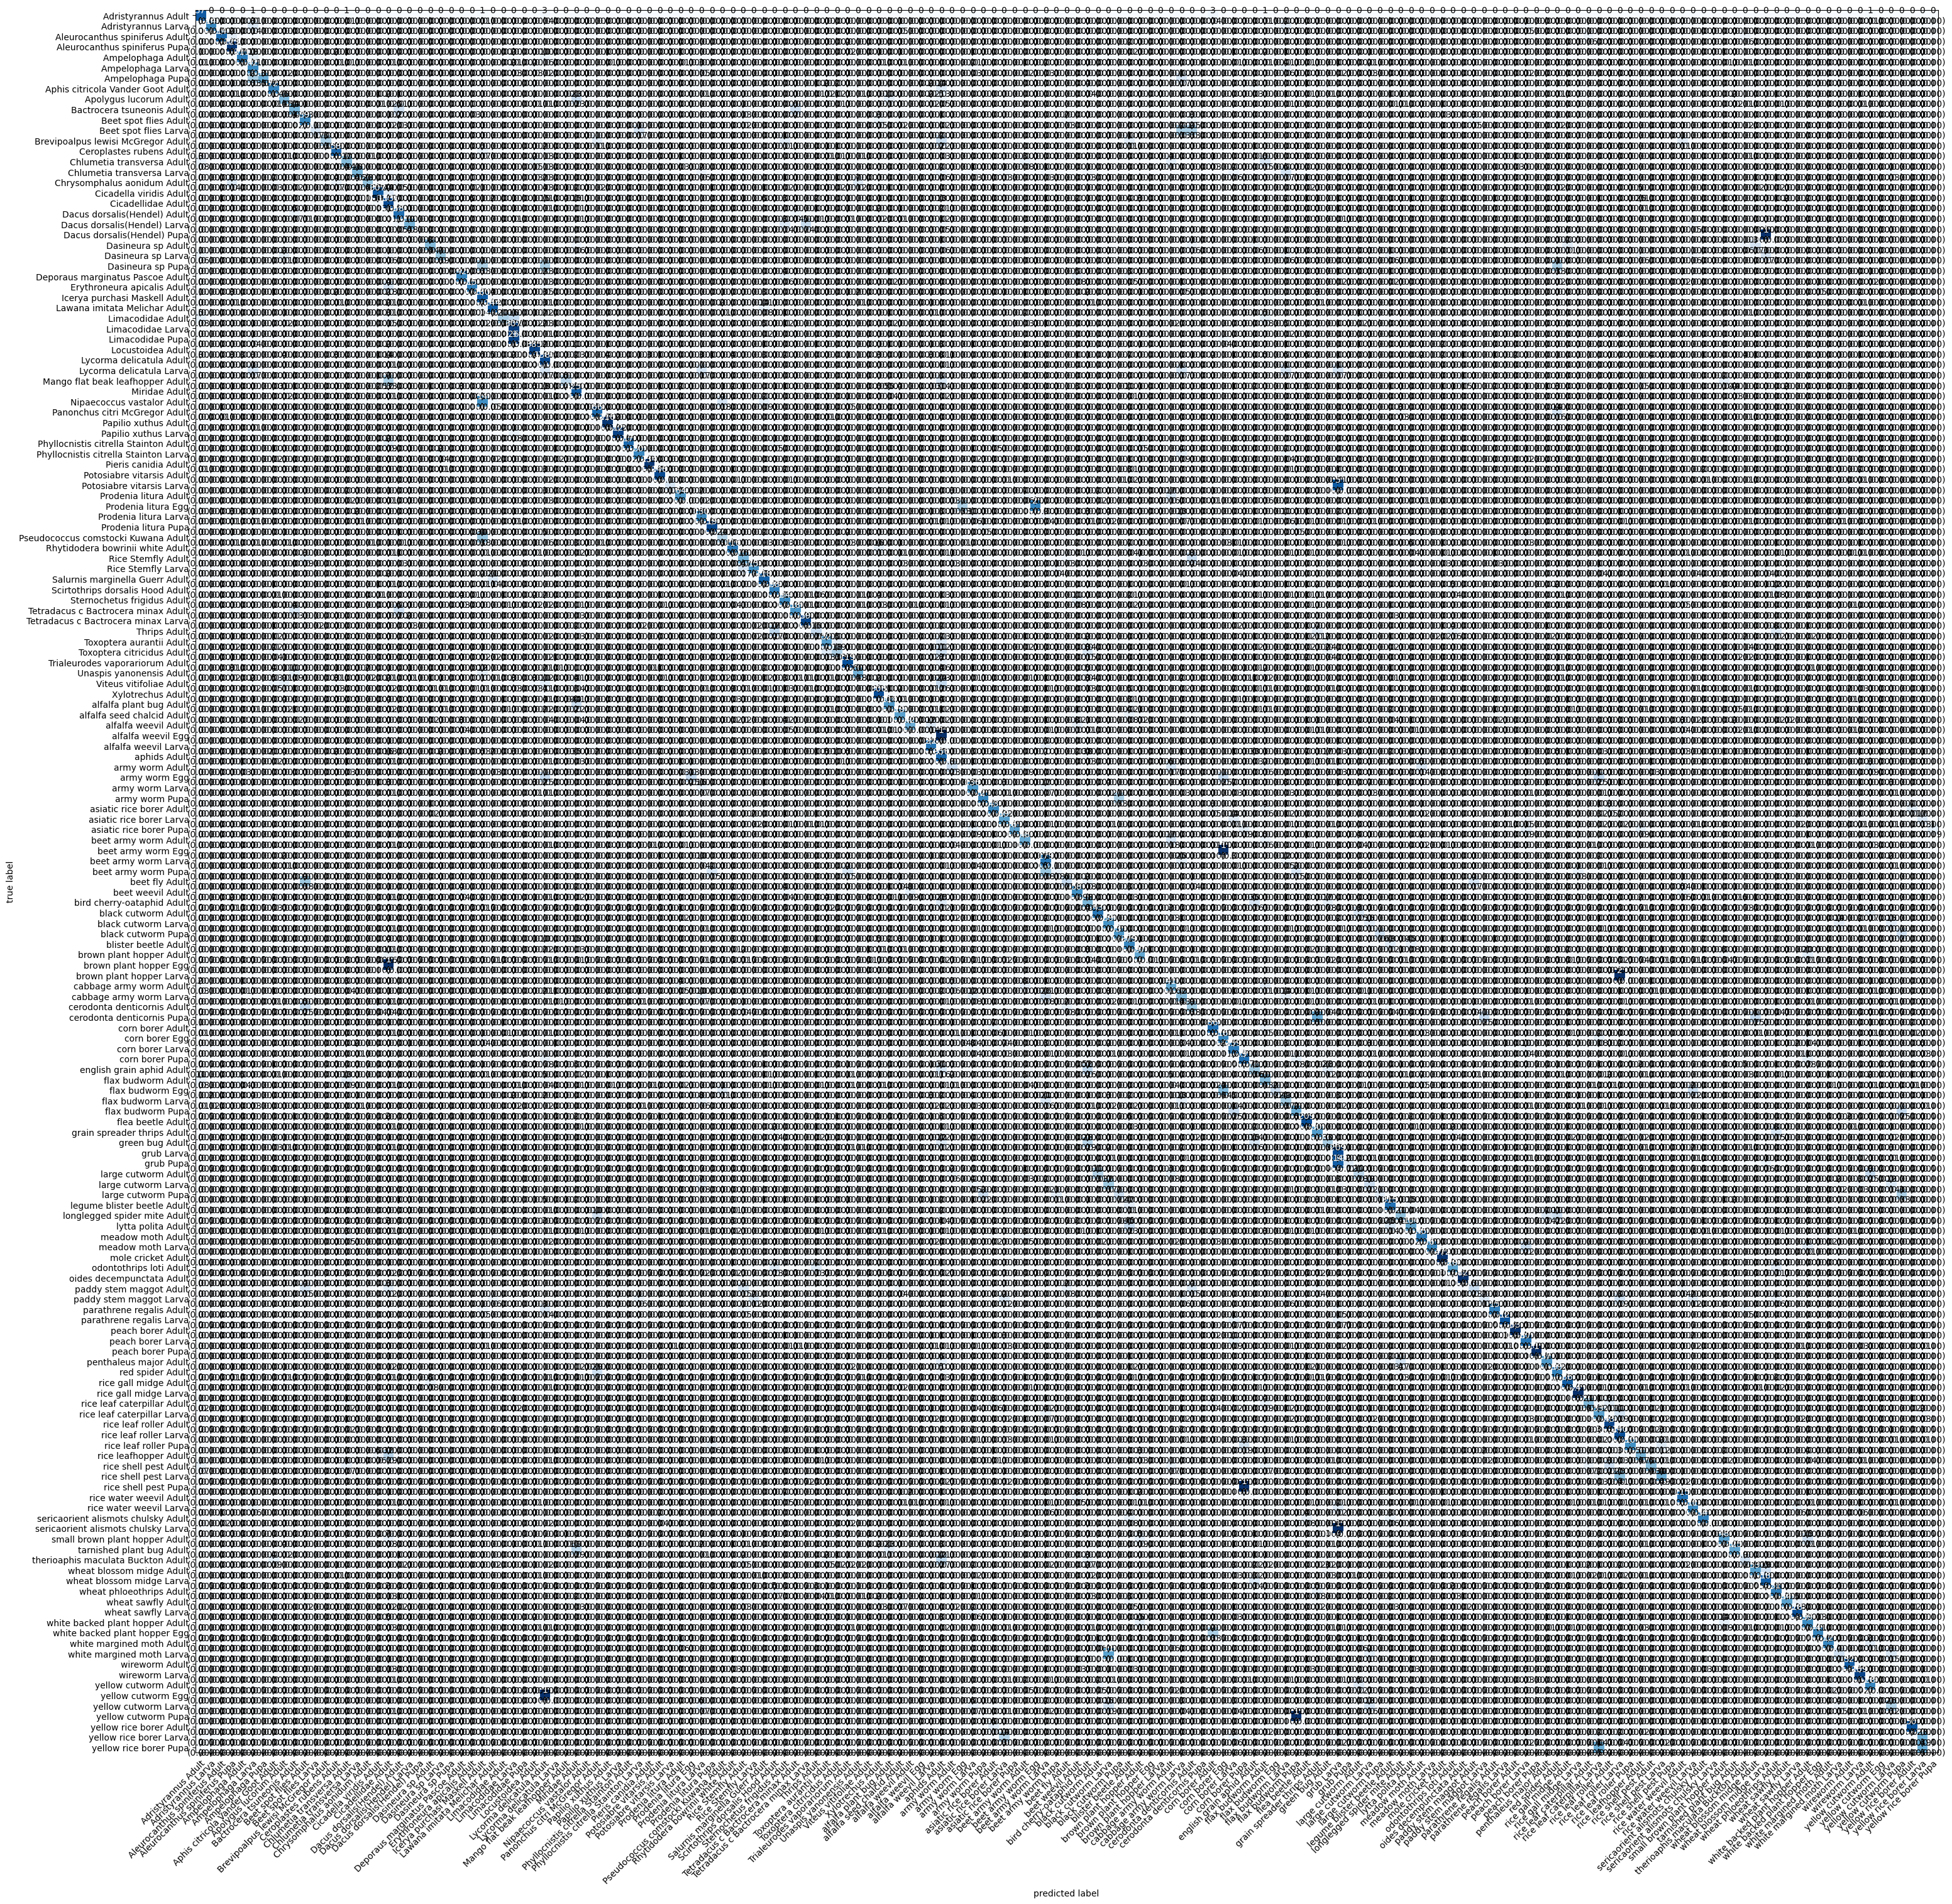

In [16]:
matRes = confusion_matrix(y_true_Res,y_pred_Res)
plot_confusion_matrix(matRes, figsize=(36,36), class_names=classes, show_normed=True)